In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import sin, pi



# Домашнее задание 1
**Вариант 14**

Задачи 

|I.8.18*| 1*.6| 3*|
|---|---|---|
||||

## I.8.18
Рассмотрим модель представления чисел в IEEE-арифметике следующего вида

$S = \{\pm b_0, b_1b_2b_3 \cdot 2^{\pm a}\}$, где числа $a, b_1, b_2, b_3 \in \{0, 1\}$, а число $b_0 = 1$ всегда, кроме того случая, когда $a=b_1=b_2=b_3=0$, в этом случае $b_0 \in\{0, 1\}$


a) Построить множество $S$ на действительной оси. Сколько чисел в данной модели арифметики у Вас получилось?

б) Чему равны машинные константы $\varepsilon_{маш}, UFL, OFL$ в этой модели?

в) Постройте график функции sin(𝑥) в заданной арифметике с плавающей запятой.

## Решение


### Пункт a


Пусть n - число принадлежащее S
1) $a=b_1=b_2=b_3=0$
    1) $n = 0.000$
    2) $n = \pm 1.000$

    Итого 3 числа
1) Иначе
    * Тогда $n$ представим в виде $n = \pm 1,b_1b_2b_3\cdot 2^{\pm a}$
    * $b_1, b_2, b_3 \in \{0, 1\} => $ всего вариантов $2^3 = 8$
    * $a \in \{-1, 0, 1\} =>$ всего вариантов 3
        
        $2 \cdot 3 \cdot 8 = 48$
    * но случаи $\pm 1.000$ уже были учтены $=> 48 - 2 = 46$
    
    Итого 46 чисел
    
Всего чисел в данной модели арифметики $46 + 3 = 49$

#### Построим множество S на действительной оси

Всего чисел в модели: 49


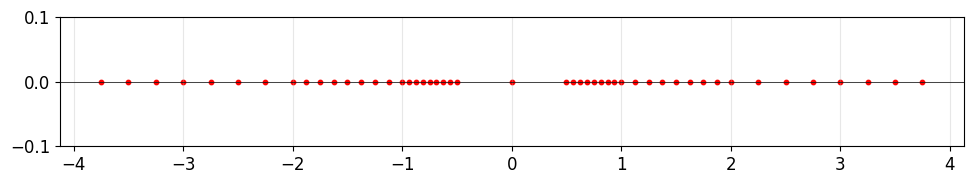

In [44]:
def generate_numbers():
    numbers = []
    
    # a = b_1 = b_2 = b_3 = 0
    numbers.append(0.0)
    numbers.append(1.0)
    numbers.append(-1.0)


    b0 = 1
    for a in [0, 1]:
        for b1 in [0, 1]:
            for b2 in [0, 1]:
                for b3 in [0, 1]:
                    if a == b1 and a == b2 and a == b3 and a == 0:
                        continue

                    # mantisa = b0 + b1 * 2^-1 + b2 * 2^-2 + b3 * 2^-3
                    mantissa = b0 + b1 * 0.5 + b2 * 0.25 + b3 * 0.125
                    
                    for sign in [1, -1]:
                        a_sign = a * sign
                        num = mantissa * (2 ** a_sign)
                        numbers.extend([num, -num])
    
    numbers = sorted(list(set(numbers)))
    return numbers

number = generate_numbers()
print(f"Всего чисел в модели: {len(number)}")


# нарисуем
plt.figure(figsize=(10, 2))
plt.scatter(number, [0]*len(number), s=10, c='red')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 0.1)
plt.tight_layout()

plt.show()


### Пункт б


#### OFL
_**Def.** Порог переполнения, который есть максимальное представимое число, так что любое большее число полагается равным бесконечности._

In [47]:
# выведем максимальное число из посчитанных в пункте a
print(max(number))


3.75


OFL соответсвует числу, полученному с помощью максимальных
$b_0,b_1,b_2, b_3, a$, т.е.

$OFL = (1 + 0,5 + 0,25 + 0,125) \cdot 2^1 = 3,75$

#### UFL
_**Def.** порог машинного нуля, - нормализованное число, что любое число полагается равным нулю (положительное)_

In [53]:
min = 100
for num in number:
    if num <= 0:
        continue
    if num < min:
        min = num
print(min)

0.5


$UFL = 1.000_2 \cdot 2^{-1}$, т.е.

$UFL = (1 + 0\cdot 0.5 + 0\cdot 0.25 + 0\cdot 0.125)\cdot 2^{-1} = 0.5$

#### $\varepsilon_{маш}$
_**Def.** максимальное число, которое в машинной арифметиге обеспечивает справедливость равентства_ $1+ \varepsilon_{маш} = 1$

В нашем случае основание $ n = (-1)^s (1 + f \cdot 2^{-3}) e^{\pm 1}$, тогда

$\varepsilon_{маш} := \frac{1}{2}\cdot 2^{-3} = 0.5 \cdot 0,125 = 0,0625$